# Mouse Cell Atlas

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scIB

In [2]:
plt.rcParams['figure.figsize'] = 8,8

In [3]:
raw_data_dir = "/home/icb/subarna.palit/projects/data/MCA DGE Data/merged/"
data_dir = "/storage/groups/ml01/workspace/group.daniela/MCA/"

In [4]:
adata = sc.read(raw_data_dir+"MCA_DGE_all_merged.h5", cache=True)

In [5]:
adata

AnnData object with n_obs × n_vars = 233445 × 34749 
    obs: 'batch'

In [6]:
adata.obs.head()

,batch
index,
BoneMarrow_1.AAGCGGAGGACTGTGGTA-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,0
BoneMarrow_1.CCGACGGGTACATAGTCG-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,0
BoneMarrow_1.AGGACTATCTCTACCTGA-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,0
BoneMarrow_1.TATGTAACTTATTCACTT-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,0
BoneMarrow_1.AAGCGGATCTCTTGCAAT-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0,0


In [7]:
split_idx = [re.split('\.|-', idx) for idx in adata.obs.index]
len(split_idx)

233445

In [8]:
adata.obs["tissue"] = [x[0].split('_')[0] for x in split_idx]
adata.obs["sample"] = [x[0] for x in split_idx]
adata.obs["barcode"] = [x[1] for x in split_idx]

In [9]:
adata.obs.index = range(0, adata.n_obs)

In [10]:
adata.obs.head()

,batch,tissue,sample,barcode
0,0,BoneMarrow,BoneMarrow_1,AAGCGGAGGACTGTGGTA
1,0,BoneMarrow,BoneMarrow_1,CCGACGGGTACATAGTCG
2,0,BoneMarrow,BoneMarrow_1,AGGACTATCTCTACCTGA
3,0,BoneMarrow,BoneMarrow_1,TATGTAACTTATTCACTT
4,0,BoneMarrow,BoneMarrow_1,AAGCGGATCTCTTGCAAT


## Cell and Tissue Annotation

In [11]:
annotation = pd.read_csv(raw_data_dir+"MCA_labels_all_merged.csv", index_col=0)

In [12]:
annotation.shape

(233445, 1)

In [13]:
annotation.head()

,0
0,Monocyte_Mif high(Bone-Marrow)
1,Neutrophil_Cebpe high(Bone-Marrow)
2,Neutrophil_Cebpe high(Bone-Marrow)
3,Neutrophil_Fcnb high(Bone-Marrow)
4,Neutrophil_Ngp high(Bone-Marrow)


In [14]:
annotation.index = range(0, annotation.shape[0])

In [15]:
split_anno = annotation["0"].str.split("(", expand=True)
ct_split = split_anno[0].str.split("_", expand=True)

adata.obs["cell_type"] = ct_split[0].tolist()
adata.obs["marker_gene"] = ct_split[1].tolist()
#adata.obs["tissue"] = split_anno[1].str.replace(")", "").tolist()

In [16]:
adata.obs.head()

,batch,tissue,sample,barcode,cell_type,marker_gene
0,0,BoneMarrow,BoneMarrow_1,AAGCGGAGGACTGTGGTA,Monocyte,Mif high
1,0,BoneMarrow,BoneMarrow_1,CCGACGGGTACATAGTCG,Neutrophil,Cebpe high
2,0,BoneMarrow,BoneMarrow_1,AGGACTATCTCTACCTGA,Neutrophil,Cebpe high
3,0,BoneMarrow,BoneMarrow_1,TATGTAACTTATTCACTT,Neutrophil,Fcnb high
4,0,BoneMarrow,BoneMarrow_1,AAGCGGATCTCTTGCAAT,Neutrophil,Ngp high


In [17]:
adata.write(data_dir+"adata_raw_annotated.h5ad")

... storing 'tissue' as categorical
... storing 'sample' as categorical
... storing 'barcode' as categorical
... storing 'cell_type' as categorical
... storing 'marker_gene' as categorical


In [18]:
adata.obs.to_csv(data_dir+"adata_annotation.csv")

In [19]:
data_dir+"adata_annotation.csv"

'/storage/groups/ml01/workspace/group.daniela/MCA/adata_annotation.csv'

## Tissues intersecting with TM

In [18]:
adata.obs['tissue'].cat.categories

Index(['Bladder', 'BoneMarrow', 'BoneMarrowcKit', 'Brain',
       'EmbryonicMesenchyme', 'EmbryonicStemCells', 'FetalBrain',
       'FetalFemaleGonad', 'FetalIntestine', 'FetalLiver', 'FetalLung',
       'FetalStomach', 'Kidney', 'Liver', 'Lung', 'Male(fetal)Gonad',
       'MammaryGland', 'Muscle', 'NeonatalBrain', 'NeonatalCalvaria',
       'NeonatalHeart', 'NeonatalMuscle', 'NeonatalPancreas', 'NeonatalRib',
       'NeonatalSkin', 'Ovary', 'Pancreas', 'PeripheralBlood', 'Placenta',
       'Prostate', 'SmallIntestine', 'Spleen', 'Stomach', 'Thymus',
       'TrophoblastStemCells', 'Uterus'],
      dtype='object')

In [19]:
tissue_renamed = ['Bladder', 'Marrow', 'BoneMarrowcKit', 'Brain',
       'EmbryonicMesenchyme', 'EmbryonicStemCells', 'FetalBrain',
       'FetalFemaleGonad', 'FetalIntestine', 'FetalLiver', 'FetalLung',
       'FetalStomach', 'Kidney', 'Liver', 'Lung', 'Male(fetal)Gonad',
       'Mammary_Gland', 'Muscle', 'NeonatalBrain', 'NeonatalCalvaria',
       'NeonatalHeart', 'NeonatalMuscle', 'NeonatalPancreas', 'NeonatalRib',
       'NeonatalSkin', 'Ovary', 'Pancreas', 'PeripheralBlood', 'Placenta',
       'Prostate', 'SmallIntestine', 'Spleen', 'Stomach', 'Thymus',
       'TrophoblastStemCells', 'Uterus']
adata.rename_categories('tissue', tissue_renamed)

In [20]:
relevant_tissues = {'Bladder', 'Brain', 'Kidney', 'Liver', 'Lung', 'Mammary_Gland',
 'Marrow', 'Limb_Muscle', 'Pancreas', 'Spleen', 'Thymus'}
len(relevant_tissues)

11

## QC

Mitochondrial genes were measured

In [21]:
sum(adata.var.index.str.startswith("mt"))

35

In [22]:
scIB.preprocessing.summarize_counts(adata, mt_gene_regex='^mt-')

There are no cells with cell type marked as nan or NA

In [23]:
cts = adata.obs["cell_type"].unique().tolist()
cts.sort()
#cts

### Filter and visualise for cell types

In [5]:
adata_full = adata

Transforming to str index.


Liver


/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData

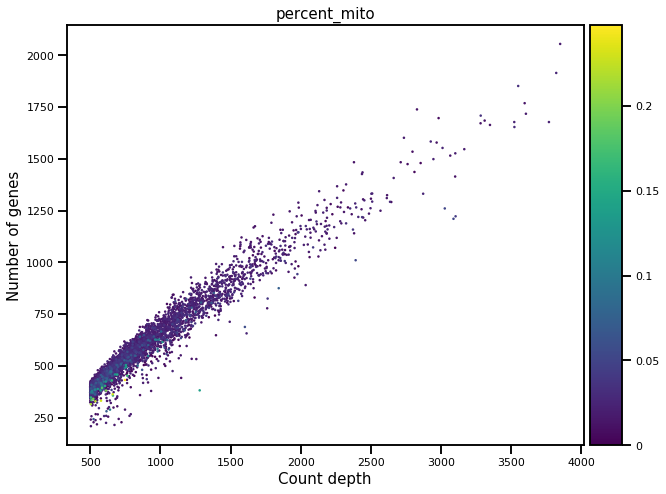

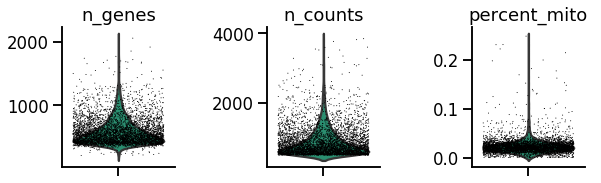

Transforming to str index.


Brain


/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData

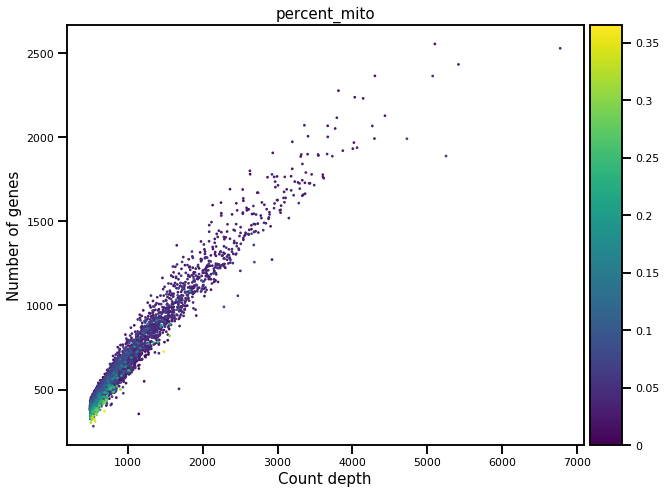

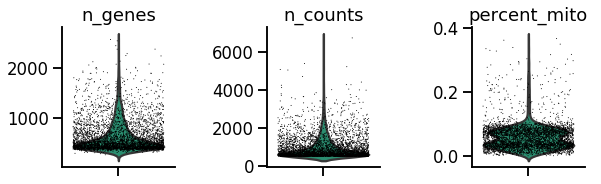

Transforming to str index.


Marrow


/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData

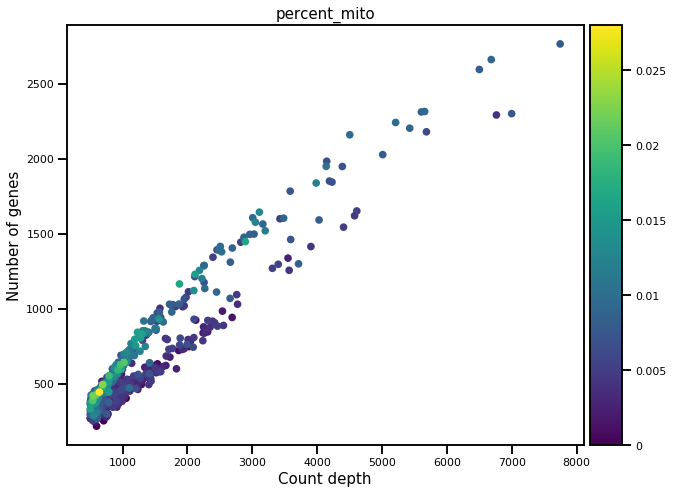

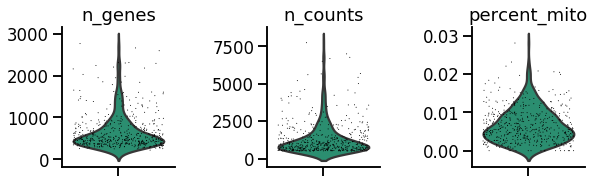

Transforming to str index.


Pancreas


/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData

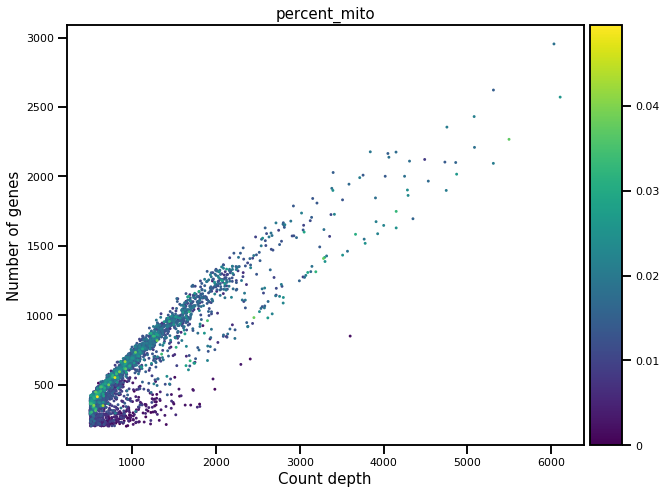

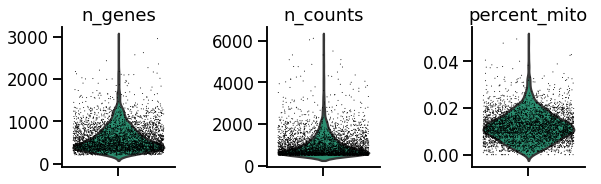

Transforming to str index.


Spleen


/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData

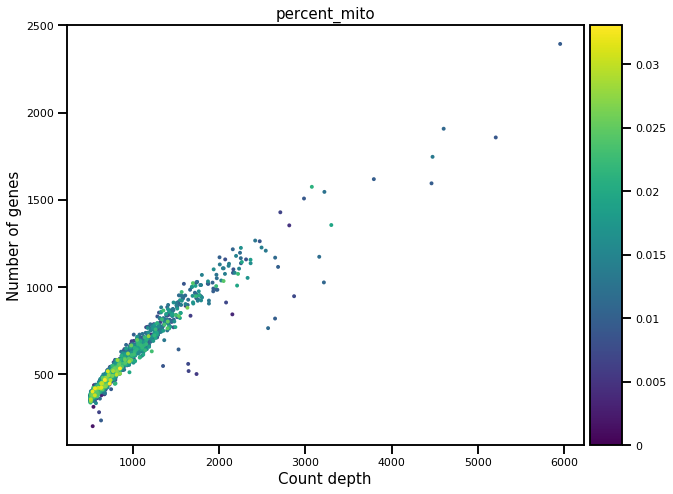

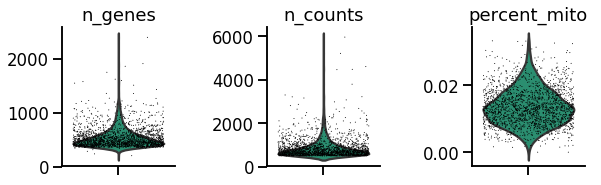

Transforming to str index.


Limb_Muscle


/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData

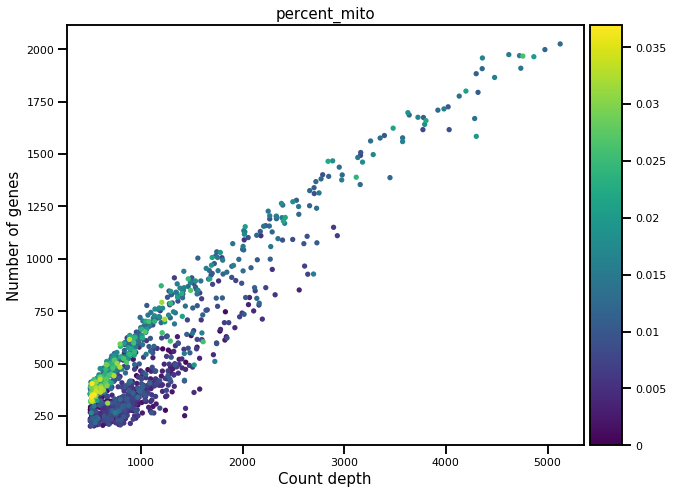

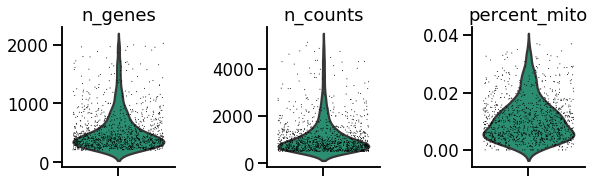

Transforming to str index.


Kidney


/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData

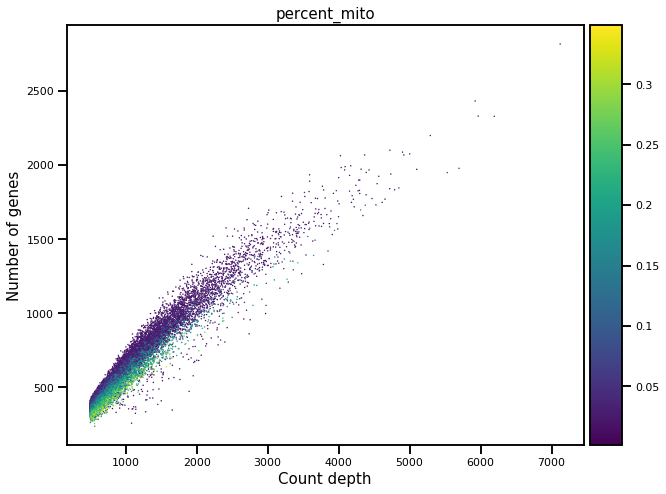

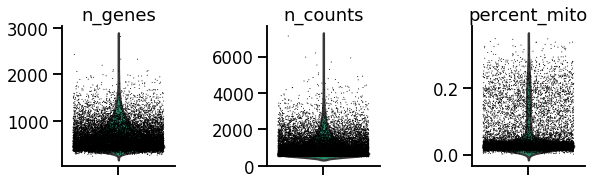

Mammary_Gland


Transforming to str index.
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In 

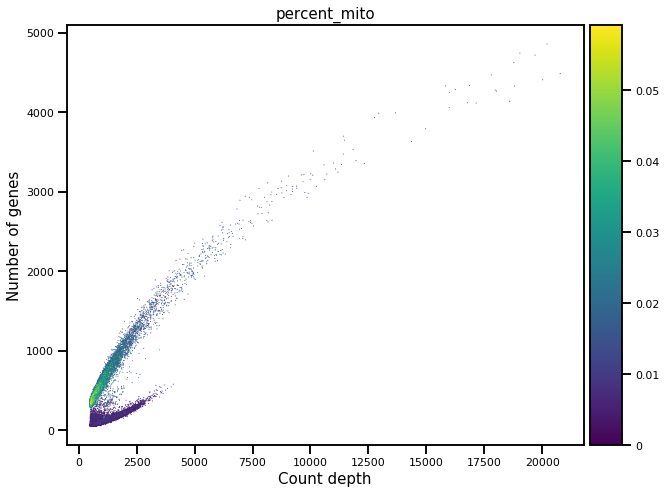

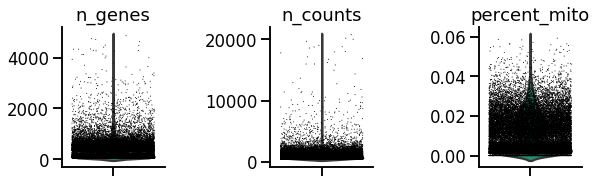

Transforming to str index.


Lung


/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData

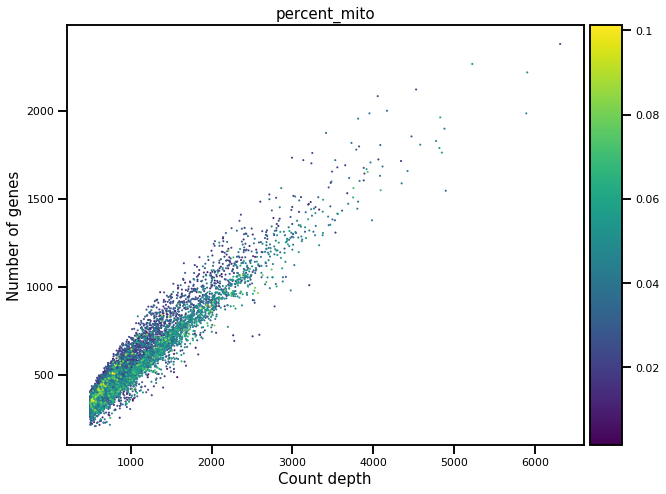

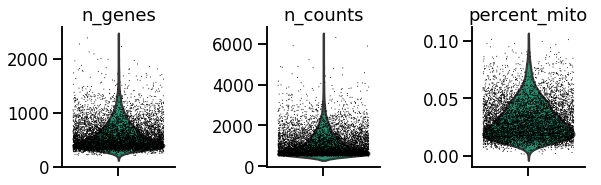

Transforming to str index.


Thymus


/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData

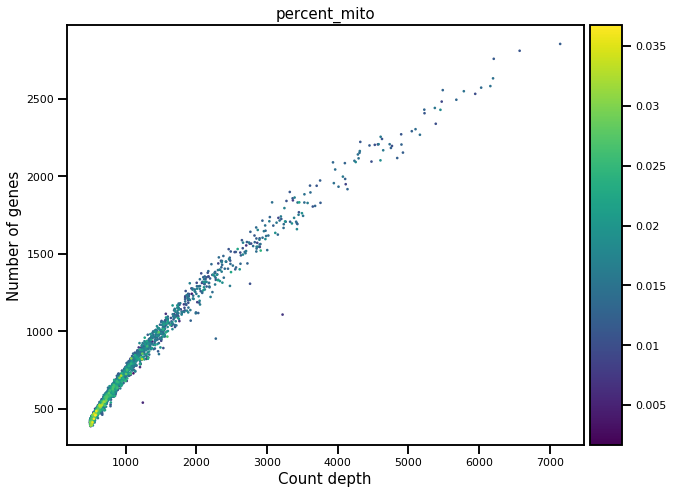

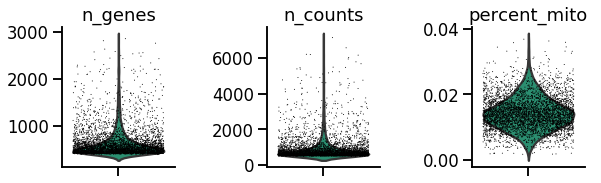

Bladder


Transforming to str index.
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:311: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  x_arr = adata._get_obs_array(x, use_raw=use_raw, layer=layers[0])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  FutureWarning
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/plotting/_anndata.py:312: DeprecationWarning: Use obs_vector instead of _get_obs_array, _get_obs_array will be removed in the future.
  y_arr = adata._get_obs_array(y, use_raw=use_raw, layer=layers[1])
/home/icb/michaela.mueller/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/anndata/core/anndata.py:1475: FutureWarning: In 

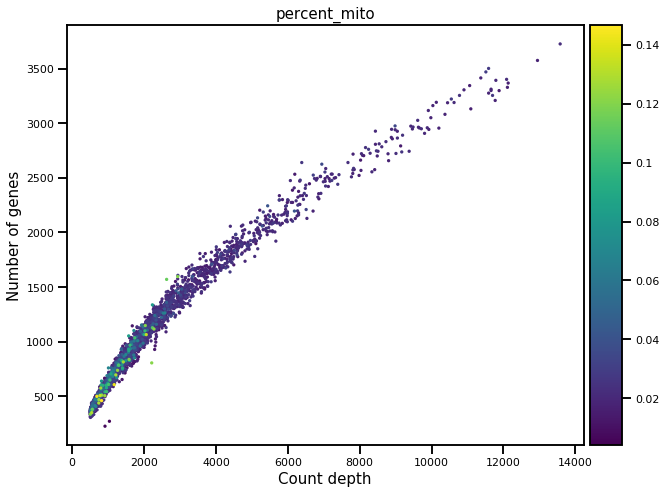

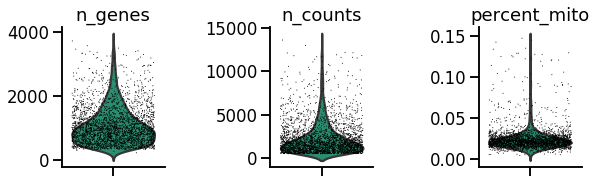

In [26]:
for tissue in relevant_tissues:
    adata = adata_full[adata_full.obs["tissue"] == tissue]
    print(tissue)
    scIB.preprocessing.plot_QC(adata, color='percent_mito')
    sc.pl.violin(adata, keys=['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

## Save Tissues separately

In [27]:
for tissue in relevant_tissues:
    print(f"{data_dir}{tissue}.h5ad")
    adata[adata.obs["tissue"] == tissue].write(f"{data_dir}{tissue}.h5ad")

/storage/groups/ml01/workspace/group.daniela/MCA/Liver.h5ad
/storage/groups/ml01/workspace/group.daniela/MCA/Brain.h5ad
/storage/groups/ml01/workspace/group.daniela/MCA/Marrow.h5ad
/storage/groups/ml01/workspace/group.daniela/MCA/Pancreas.h5ad
/storage/groups/ml01/workspace/group.daniela/MCA/Spleen.h5ad
/storage/groups/ml01/workspace/group.daniela/MCA/Limb_Muscle.h5ad
/storage/groups/ml01/workspace/group.daniela/MCA/Kidney.h5ad
/storage/groups/ml01/workspace/group.daniela/MCA/Mammary_Gland.h5ad
/storage/groups/ml01/workspace/group.daniela/MCA/Lung.h5ad
/storage/groups/ml01/workspace/group.daniela/MCA/Thymus.h5ad
/storage/groups/ml01/workspace/group.daniela/MCA/Bladder.h5ad
